In [4]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [5]:
data = np.loadtxt('data.txt', skiprows=1)
indices = np.loadtxt('pares.txt', dtype=int)

In [6]:
posiciones = data[:,0:3]
velocidades = data[:,3:6]
masa = data[:,6:7]

### Calculo de Distancias 

In [7]:
pos1 = posiciones[indices[:,0]]
pos2 = posiciones[indices[:,1]]

r = pos1 - pos2

In [8]:
r1 = r[:,0]
r2 = r[:,1]
r3 = r[:,2]

R = sqrt(r1**2+r2**2+r3**2)
#np.savetxt('distancia.txt',R)

### Vector Unitario

In [9]:
runi1 = r1/R
runi2 = r2/R
runi3 = r3/R

runi = (runi1,runi2,runi3)
RUNI = transpose(runi)

### Calculo de Masa

In [10]:
masa1 = masa[indices[:,0]]
masa2 = masa[indices[:,1]]
MasaT = masa1 + masa2

#np.savetxt('MasaTotal.txt',MasaT)

### Calculo de Velocidades Relativas

In [11]:
vel1 = velocidades[indices[:,0]]
vel2 = velocidades[indices[:,1]]

VelR = vel1 - vel2
VelRx = VelR[:,0]
VelRy = VelR[:,1]
VelRz = VelR[:,2]

VelRA = np.sqrt(VelRx**2+VelRy**2+VelRz**2)


#np.savetxt('VelRelaAbs.txt', VelRA)

### Velocidades Paralelas y Perpendiculares

In [12]:
Vparalela = RUNI[:,0]*VelR[:,0] + RUNI[:,1]*VelR[:,1] + RUNI[:,2]*VelR[:,2]
VparalelaVec1 = RUNI[:,0]*Vparalela, RUNI[:,1]*Vparalela, RUNI[:,2]*Vparalela
VparalelaVec = np.transpose(VparalelaVec1)

#np.savetxt('VelParalela.txt',Vparalela)


In [13]:
VperpernVec = VelR - VparalelaVec
Vperpendicular = np.sqrt(VperpernVec[:,0]**2+VperpernVec[:,1]**2+VperpernVec[:,2]**2)

#np.savetxt('VelPerpendicular.txt',Vperpendicular)


##### Condicionamos los incides para que sus velocidades sean negativas entre 0 y 150 km/s. También, necesitamos distancias menores a 2Mpc. 

In [14]:
indices_cota = (Vparalela > -150.0) & (Vparalela < 0.0) & (R<2.0)

### Histogramas de Distancias

Definimos una funcion que arroje el valor con mas repeticiones.

In [15]:
def masrepetido(lst):
    return max(set(lst), key=lst.count)

0.942001624202419


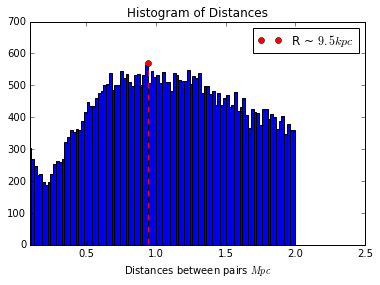

In [16]:
R_cota = R[indices_cota]

hist(R_cota,bins=100)
print(masrepetido(R_cota.tolist()))
xlim(0.1,2.5)
plot(0.942,570,'o',color='r',label = r'R ~ $9.5 kpc$')
plot([0.942,0.942],[0.942,570], '--' ,color='r')
legend(loc = "best")

title('Histogram of Distances')
xlabel(r'Distances between pairs $Mpc$')

12.2847533056


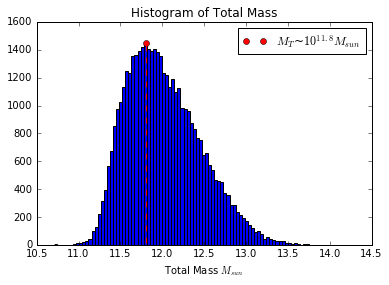

In [17]:
MasaT_Cota = MasaT[indices_cota]
#MasaT_cota = [i[0] for i in MasaT_Cota]
print(np.log10(MasaT_Cota.mean()))

hist(log10(MasaT_Cota),bins=100)

plot(11.8,1450,'o',color='r',label=r'$M_{T}$~$10^{11.8}M_{sun}$')
plot([11.8,11.8],[11.8,1450],'--',color='r')
legend(loc = "best")

title('Histogram of Total Mass')
xlabel(r'Total Mass $M_{sun}$')


2.19414192381


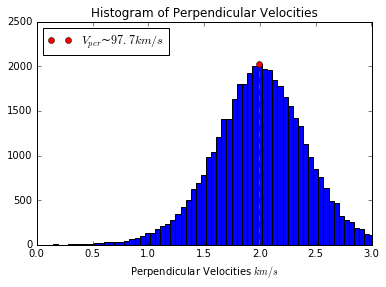

In [42]:
Vperpendicular_cota = Vperpendicular[indices_cota]

hist(log10(Vperpendicular_cota),bins=100)
#print(masrepetido((log10(Vperpendicular_cota)).tolist()))
print(np.log10(Vperpendicular_cota.mean()))

plot(1.99,2030,'o',color='r',label=r'$V_{per}$~$97.7 km/s$')
plot([1.99,1.99],[1.99,2030],'--',color='r')
legend(loc = "upper left")

xlim(0,3)
title('Histogram of Perpendicular Velocities')
xlabel(r'Perpendicular Velocities $km/s$')


-42.2050117317


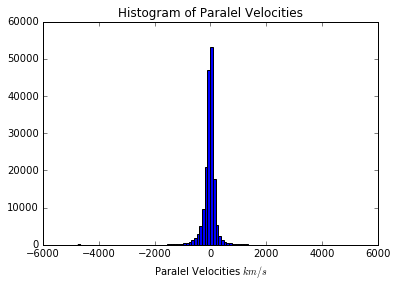

In [49]:
Vparalela_cota = Vparalela[indices_cota]

hist(Vparalela,bins=100)
print(Vparalela.mean())

title('Histogram of Paralel Velocities')
xlabel(r'Paralel Velocities $km/s$')

In [20]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

In [21]:
print(np.shape(MasaT_Cota[:,0]))

(42901,)


#### Realizamos LASSO para predecir las masas:

In [22]:
X1 = transpose([log10(R_cota),log10(Vperpendicular_cota),log10(abs((Vparalela_cota)))])
y1 = log10(MasaT_Cota[:,0])

n1 = X1.shape[0]
X1_train, y1_train = X1[:n1 / 2], y1[:n1 / 2]
X1_test, y1_test = X1[n1 / 2:], y1[n1 / 2:]

alpha = 1E-3
lasso1 = Lasso(alpha=alpha)

y1_pred_lasso = lasso1.fit(X1_train, y1_train).predict(X1_test)

/Users/sebastianvelasco/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sebastianvelasco/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


12.009971213810424


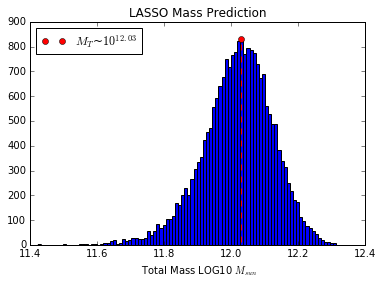

In [29]:
plt.hist(y1_pred_lasso,bins=100)
print(masrepetido(y1_pred_lasso.tolist()))

plot(12.03,830,'o',color='r',label=r'$M_{T}$~$10^{12.03}$')
plot([12.03,12.03],[12.03,830],'--',color='r')
legend(loc = "upper left")

title('LASSO Mass Prediction')
xlabel(r' Total Mass LOG10 $M_{sun}$')

#### Realizamos LASSO para predecir las Velocidades Perpendiculares

In [30]:
X2 = transpose([log10(R_cota),log10(abs(Vparalela_cota)),log10(MasaT_Cota[:,0])])
y2 = log10(Vperpendicular_cota)

n2 = X2.shape[0]
X2_train, y2_train = X2[:n2 / 2], y2[:n2 / 2]
X2_test, y2_test = X2[n2 / 2:], y2[n2 / 2:]

alpha = 1E-3
lasso2 = Lasso(alpha=alpha)

y2_pred_lasso = lasso2.fit(X2_train, y2_train).predict(X2_test)

/Users/sebastianvelasco/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sebastianvelasco/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1.9050168483490495


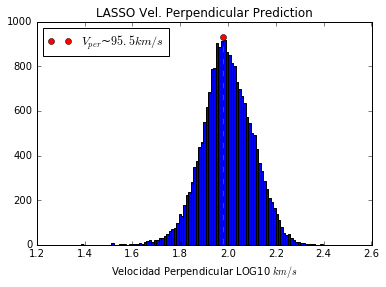

In [41]:
plt.hist(y2_pred_lasso,bins=100)
print(masrepetido(y2_pred_lasso.tolist()))

plot(1.98,930,'o',color='r',label=r'$V_{per}$~$95.5 km/s$')
plot([1.98,1.98],[1.98,930],'--',color='r')
legend(loc = "upper left")

title('LASSO Vel. Perpendicular Prediction')
xlabel(r'Velocidad Perpendicular LOG10 $km/s$')